In [58]:
# TensorFlow and tf.keras
import tensorflow as tf
import warnings

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageOps 
from PIL import ImageFilter

import os


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import log_loss, mean_squared_error

import pandas as pd


In [59]:
class_names = ['A', 'B', 'C', 'D','E', 'F', 'G', 'H','I', 'J', 'K', 'L','M', 'N', 'O', 'P','Q','R' ,'S', 'T', 'U','V', 'W', 'X', 'Y', 'Z']

In [60]:
def assign_label(img,flower_type):
    return flower_type

In [62]:
X=[]
Z=[]
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = Image.open(path)
        img_gray = ImageOps.grayscale(img)
        img_gray = img_gray.resize( (100,100))
        img_gray = img_gray.filter(ImageFilter.DETAIL)
        X.append(np.array(img_gray))
        Z.append(str(label))
        


In [63]:
make_train_data('A','asset\A')
make_train_data('B','asset\B')
make_train_data('C','asset/C')
make_train_data('D','asset\D')
make_train_data('E','asset\E')
make_train_data('F','asset\F')
make_train_data('G','asset/G')
make_train_data('H','asset\H')
make_train_data('I','asset\I')
make_train_data('J','asset\J')
make_train_data('K','asset/K')
make_train_data('L','asset\L')
make_train_data('M','asset\M')
make_train_data('N','asset/N')
make_train_data('O','asset/O')
make_train_data('P','asset\P')
make_train_data('Q','asset\Q')
make_train_data('R','asset\R')
make_train_data('S','asset/S')
make_train_data('T','asset\T')
make_train_data('U','asset/U')
make_train_data('V','asset\V')
make_train_data('W','asset/W')
make_train_data('X','asset\X')
make_train_data('Y','asset\Y')
make_train_data('Z','asset\Z')

In [67]:
le=LabelEncoder()
Y=le.fit_transform(Z)
x=np.array(X)
X=x/255

In [68]:
Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [70]:
# train_images,test_images , train_labels, test_labels = train_test_split(X,Y, test_size=0.23, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.13,random_state=42)

In [71]:
#len(train_images)
len(x_train)


226

In [72]:
# len(test_images)
len(x_test)


34

In [73]:
# train_labels
y_train

array([19, 10, 21,  1, 11,  9,  9, 15,  2, 15,  1, 23, 13,  6,  9, 16,  9,
       20,  6, 24,  1,  5, 12,  7, 22,  7, 18,  3,  6, 14,  6, 22, 24, 11,
       10, 11, 16, 18, 12, 13, 16, 12,  8, 14,  6,  0, 25,  8, 12, 18,  8,
       25, 17,  2, 19, 17, 19, 14,  0,  5, 13, 15, 14,  6, 14,  8, 22, 21,
        3,  1,  3,  2,  4, 12, 10, 11,  2, 13,  9, 17, 11,  5, 11, 16,  9,
       24, 20,  7,  4, 19, 23,  7, 15,  2, 25, 17,  0, 25, 10, 25, 18,  9,
        3,  6, 23, 14,  1, 25, 20,  2, 16,  0, 12,  3, 15, 19, 13,  6, 13,
       12, 23, 19,  7, 24,  6,  4, 17, 15,  4, 12, 15,  2, 19, 19,  8,  3,
       22,  4,  9, 20, 16,  4, 14, 18,  0, 10,  5, 13, 24, 23, 24,  4, 16,
        8,  3, 21,  0, 17, 22, 11,  9,  8, 23, 24,  8,  0,  1,  5, 22, 13,
        1, 16,  7, 23, 13, 25, 24,  6,  5, 10,  5, 21, 17, 22, 18,  1, 20,
       23, 21, 16,  5, 21,  4,  8,  2,  5, 20, 16, 25, 18, 19, 12,  3, 15,
       23, 24,  0,  5, 14, 13, 15, 10,  9, 11,  8, 20,  7, 21, 21, 12, 25,
        2, 18,  7, 10, 10

In [74]:
# test_images.shape
x_test.shape


(34, 100, 100)

In [75]:
# len(test_labels)
len(y_test)


34

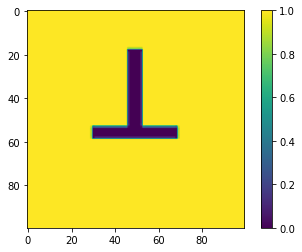

In [76]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()



In [77]:
x_train = x_train / 255.0
x_test = x_test / 255.0

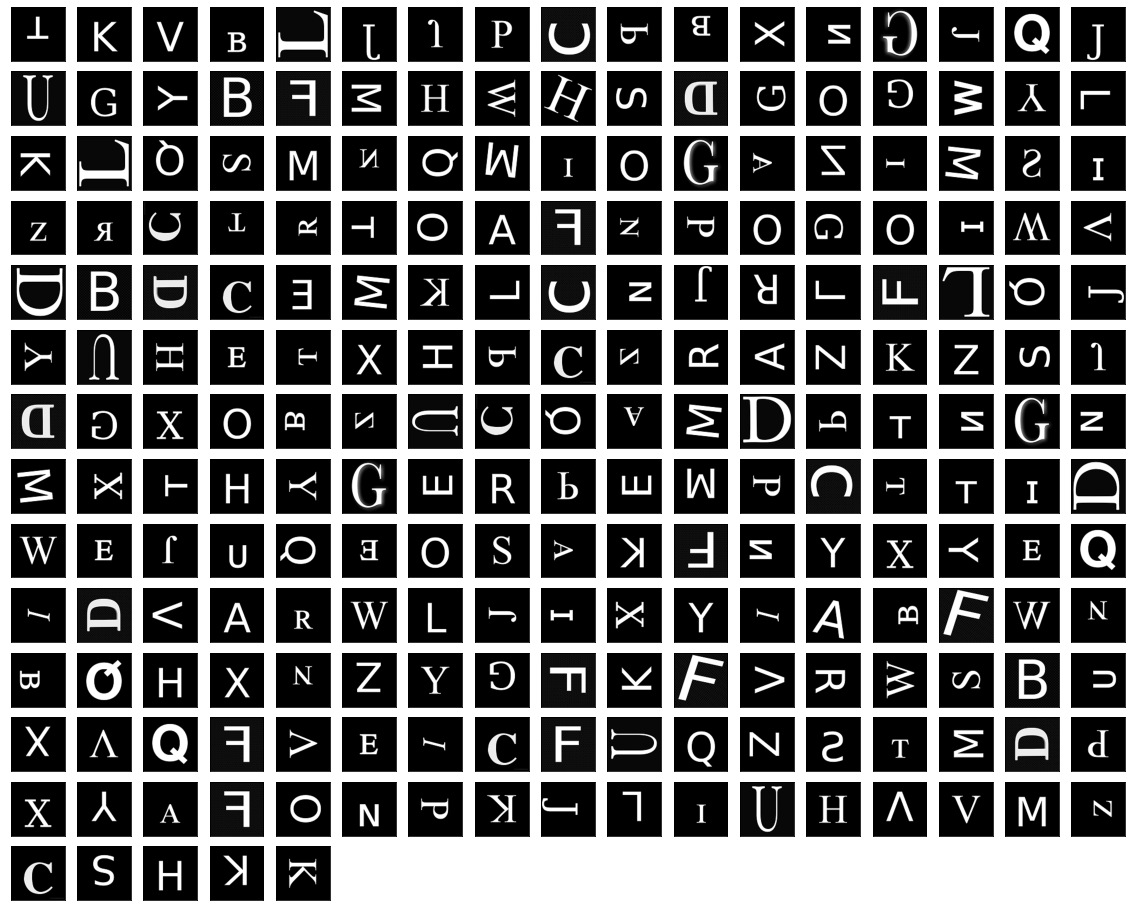

In [78]:
plt.figure(figsize=(20,20))
for i in range(len(x_train)):
    plt.subplot(17,17,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
plt.show()

In [79]:
# applying layers with hidden layers and fixed no .of neurons in them

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
   
    tf.keras.layers.Dense(26)
])

In [82]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [83]:
model.fit(x_train, y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 63ms/step - loss: 3.2674 - accuracy: 0.0221
Epoch 2/300
8/8 [==============================] - 1s 68ms/step - loss: 3.2618 - accuracy: 0.0442
Epoch 3/300
8/8 [==============================] - 1s 69ms/step - loss: 3.2659 - accuracy: 0.0310
Epoch 4/300
8/8 [==============================] - 1s 66ms/step - loss: 3.2556 - accuracy: 0.0310
Epoch 5/300
8/8 [==============================] - 1s 67ms/step - loss: 3.2566 - accuracy: 0.0442
Epoch 6/300
8/8 [==============================] - 1s 65ms/step - loss: 3.2569 - accuracy: 0.0442
Epoch 7/300
8/8 [==============================] - 1s 65ms/step - loss: 3.2566 - accuracy: 0.0442
Epoch 8/300
8/8 [==============================] - 1s 66ms/step - loss: 3.2567 - accuracy: 0.0442
Epoch 9/300
8/8 [==============================] - 1s 66ms/step - loss: 3.2573 - accuracy: 0.0398
Epoch 10/300
8/8 [==============================] - 1s 68ms/step - loss: 3.2552 - accuracy: 0.0442
Epoch 11/300
8/8 [=

8/8 [==============================] - 1s 67ms/step - loss: 1.3619 - accuracy: 0.4027
Epoch 165/300
8/8 [==============================] - 1s 66ms/step - loss: 1.4582 - accuracy: 0.3496
Epoch 166/300
8/8 [==============================] - 1s 68ms/step - loss: 1.4462 - accuracy: 0.3628
Epoch 167/300
8/8 [==============================] - 1s 69ms/step - loss: 1.3414 - accuracy: 0.4248
Epoch 168/300
8/8 [==============================] - 1s 68ms/step - loss: 1.3040 - accuracy: 0.4336
Epoch 169/300
8/8 [==============================] - 1s 67ms/step - loss: 1.3040 - accuracy: 0.4735
Epoch 170/300
8/8 [==============================] - 1s 66ms/step - loss: 1.1969 - accuracy: 0.5265
Epoch 171/300
8/8 [==============================] - 1s 66ms/step - loss: 1.3188 - accuracy: 0.4381
Epoch 172/300
8/8 [==============================] - 1s 69ms/step - loss: 1.1761 - accuracy: 0.4867
Epoch 173/300
8/8 [==============================] - 1s 66ms/step - loss: 1.5143 - accuracy: 0.3761
Epoch 174/300


# I have tried different layer with different neurons, but I got maximum test accuracy on above hidden layer and neuron

In [84]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 3.4062 - accuracy: 0.4412

Test accuracy: 0.44117647409439087


In [85]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [86]:
predictions = probability_model.predict(x_train)

In [87]:
predictions

array([[5.5917153e-06, 8.5570537e-05, 6.3603270e-21, ..., 6.4068199e-19,
        2.7607537e-03, 1.1028612e-05],
       [5.5891293e-04, 6.0723454e-07, 4.2881313e-13, ..., 7.2981900e-04,
        7.5124747e-11, 1.4575529e-03],
       [1.6223546e-02, 9.7634183e-05, 2.4524425e-09, ..., 9.8218979e-06,
        1.5761842e-09, 7.8544267e-02],
       ...,
       [8.7943551e-04, 3.2492995e-03, 3.1733887e-08, ..., 3.9943999e-15,
        1.6038770e-14, 1.7177109e-02],
       [4.3888050e-04, 3.6368525e-07, 2.0352757e-13, ..., 2.5664901e-04,
        2.4334378e-11, 1.4553774e-03],
       [5.5475911e-04, 5.4443927e-07, 5.2634308e-13, ..., 1.7098639e-04,
        3.4178181e-11, 2.0172538e-03]], dtype=float32)

In [88]:
print(np.argmax(predictions[0]))

19


In [89]:
model.get_weights()

[array([[ 0.01759835,  0.0133001 , -0.00133735, ...,  0.01791869,
          0.01898698,  0.01505744],
        [ 0.00689699,  0.00649002, -0.01236459, ..., -0.00654964,
          0.01523592, -0.01954488],
        [-0.0212095 , -0.00149063,  0.01921251, ..., -0.01239173,
         -0.00623884, -0.02406777],
        ...,
        [-0.00604908,  0.01345791, -0.01028477, ...,  0.00604908,
         -0.0184419 ,  0.00633918],
        [-0.01893537, -0.00368816,  0.01464681, ..., -0.0164117 ,
          0.01396938,  0.018104  ],
        [ 0.01485246, -0.02540805,  0.02244204, ...,  0.00202937,
         -0.01153868, -0.00374296]], dtype=float32),
 array([ 0.0000000e+00, -3.0065991e-03, -4.5602834e-03, -1.2955073e-02,
         6.4658227e-05, -5.9826155e-03, -2.6873997e-03,  0.0000000e+00,
        -5.9964894e-03, -5.7876483e-03, -3.5331391e-03, -5.9976005e-03,
        -5.0675776e-03, -3.7442849e-03, -2.8121402e-03, -5.9973197e-03,
        -5.9694774e-03,  0.0000000e+00, -2.9728694e-03, -3.5024679e-03